# Heart Disease Analysis

dataset: 

# Import Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

# Load the dataset

In [66]:
df = pd.read_csv("data/heart.csv")

# 1) Understanding Data

### 1a) shape and short descriptions

In [70]:
df.info
df.shape
df.dtypes
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I now know what the data should look like in VS code and the types of data I'm working with

 column interpretation: age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by flourosopy, disease or not

### 1b) Averages and data trends
Now I'll know the exact trends of all columns

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# 2) Sorting the data

### 2a) Renaming Columns
These column names are very hard to understand so I'm going to specify a bit so I don't have to keep googling what they mean

In [69]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'})

### 2b) Counting NA

In [75]:
df.isna().sum()
df["num_major_vessels"].value_counts()
df["thalassemia"].value_counts()
df["chest_pain_type"].value_counts()
df["target"].value_counts()
df["exercise_induced_angina"].value_counts()
df["resting_electrocardiogram"].value_counts()
df = df[df["num_major_vessels"] < 4] #drop nonexistant ca values
df = df[df["thalassemia"] > 0] # drop nonexistant thal values
df.shape

(296, 14)

Ultimately, I removed 7 rows which contained values outside of the ranges for real input

# 3) Finding Correlations and Patterns

### 3a) visualizing values for every column
This would give me a better perspective on what my data looks like and what to expect from it

In [ ]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	
	# Kernel density plot
	sns.histplot(df[feature], kde=True)
	plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


### 3b) Scatterplotting
This is my main step in finding correlations

Text(0.5, 1.0, 'heart_rate vs speed')

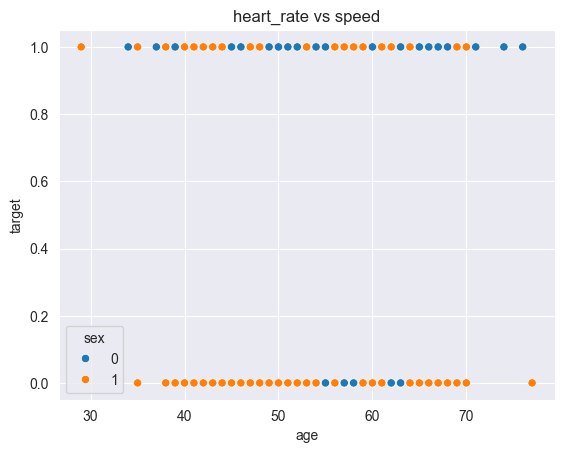

In [74]:
sns.scatterplot(data=df, x="age", y="target", hue="sex")
plt.title("heart_rate vs speed")

I then put this code in a loop to give me all the scatterplots

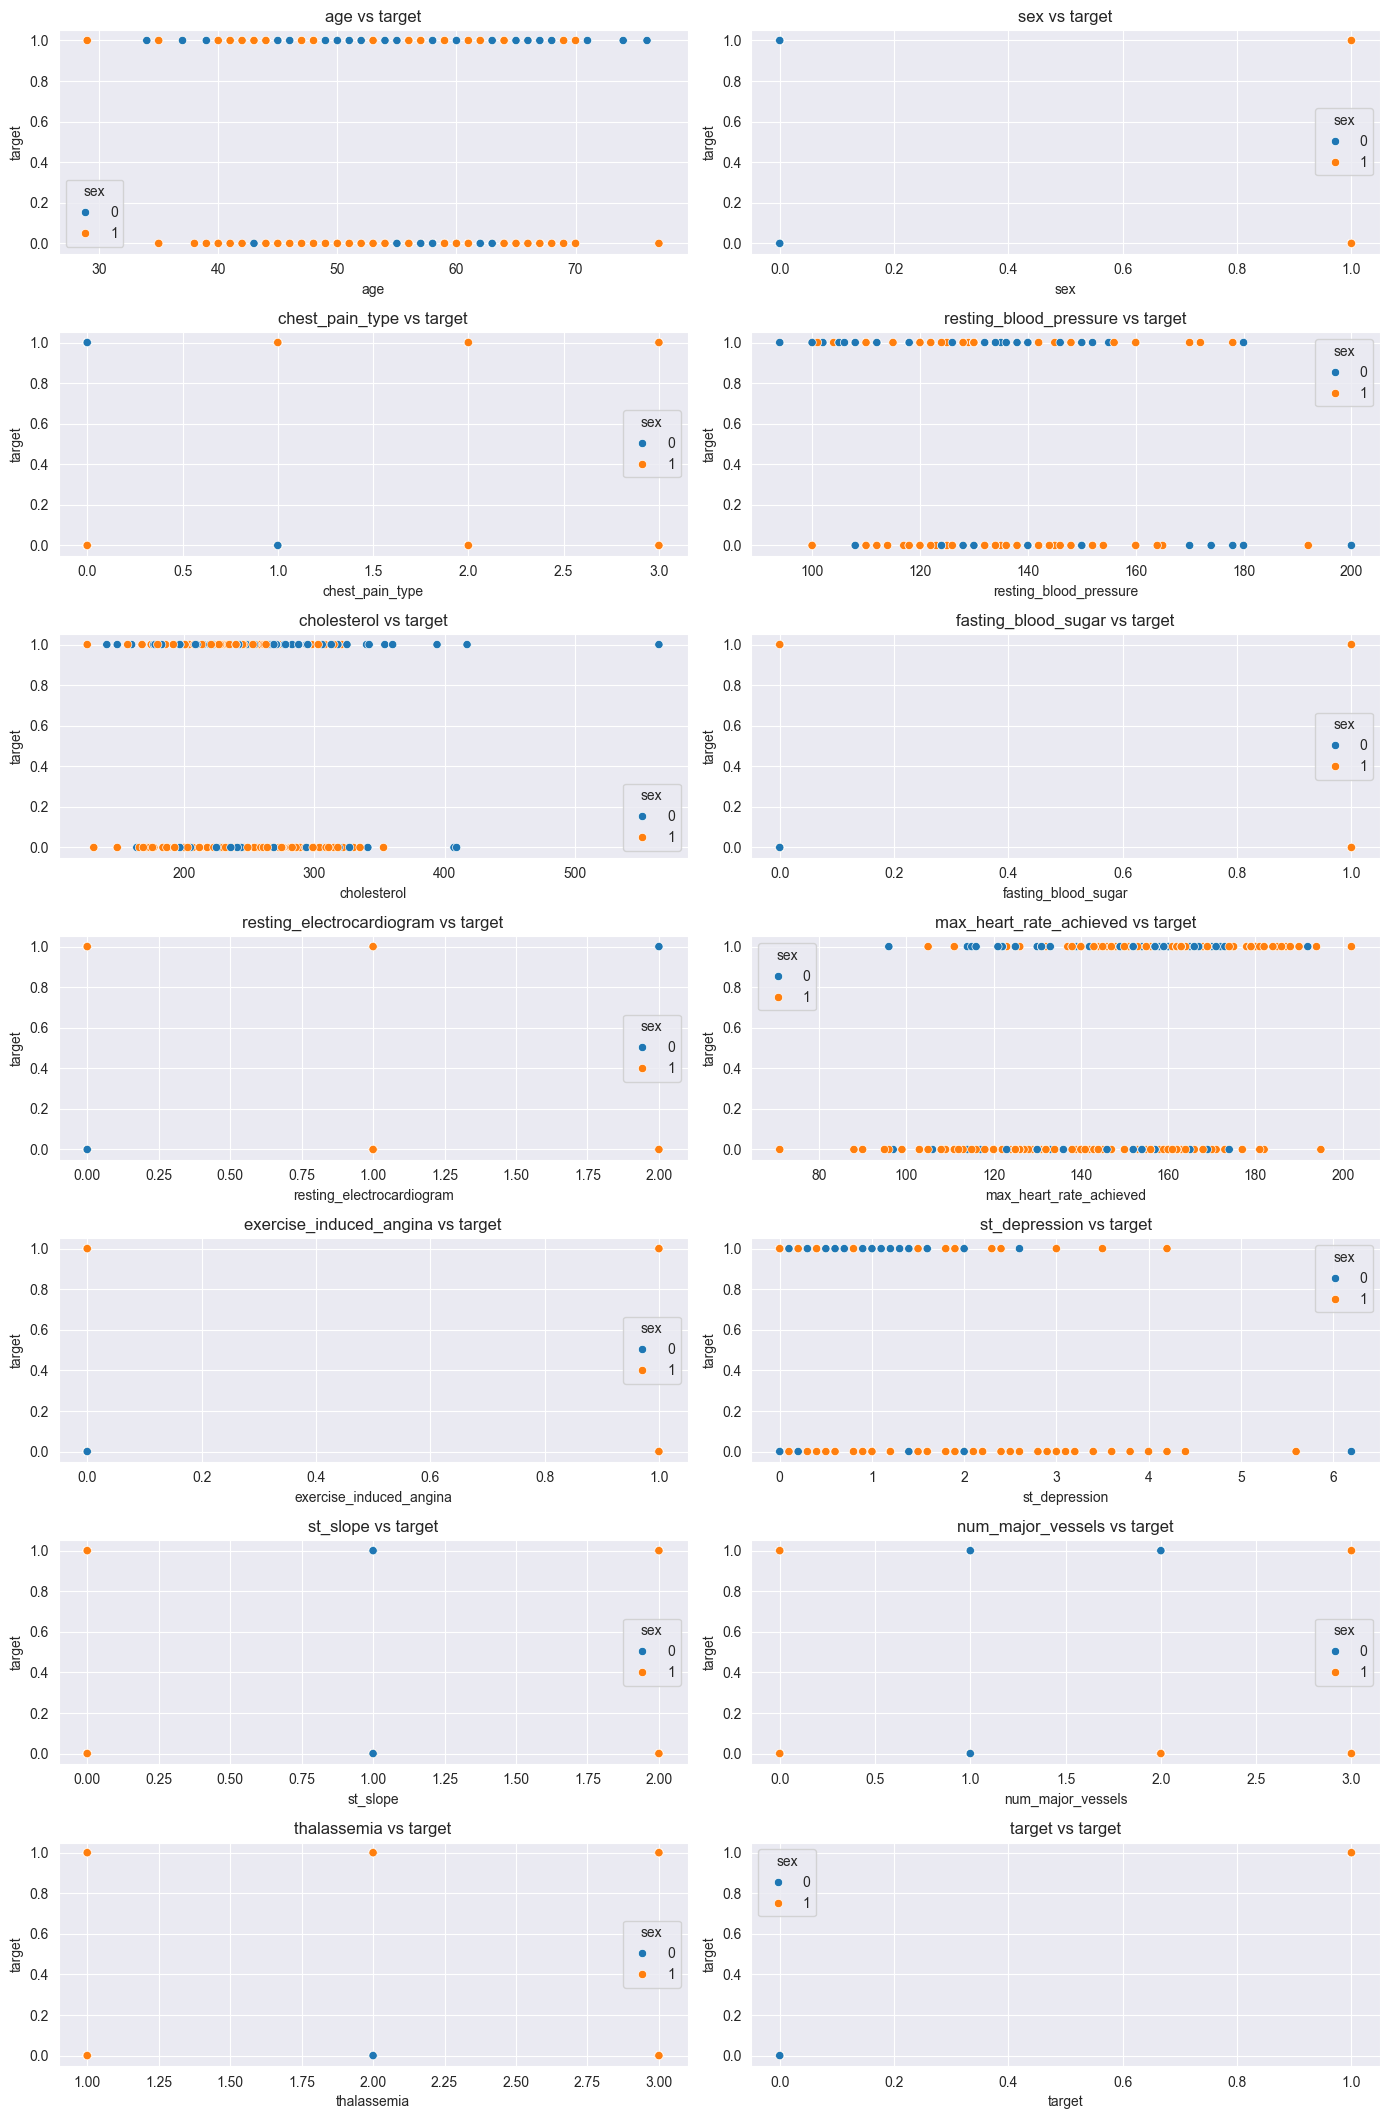

In [77]:
# Set Seaborn style
sns.set_style("darkgrid")

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(df.columns) * 3))
for idx, feature in enumerate(df.columns, 1):
	plt.subplot(len(df.columns), 2, idx)
	
	# Kernel density plot
	sns.scatterplot(data=df, x=feature, y="target", hue="sex")
	plt.title(feature + " vs target" )

# Adjust layout and show plots
plt.tight_layout()
plt.show()

However, scatterplots are not exactly the best graph for some of my columns so I used the same code but this time with histplots

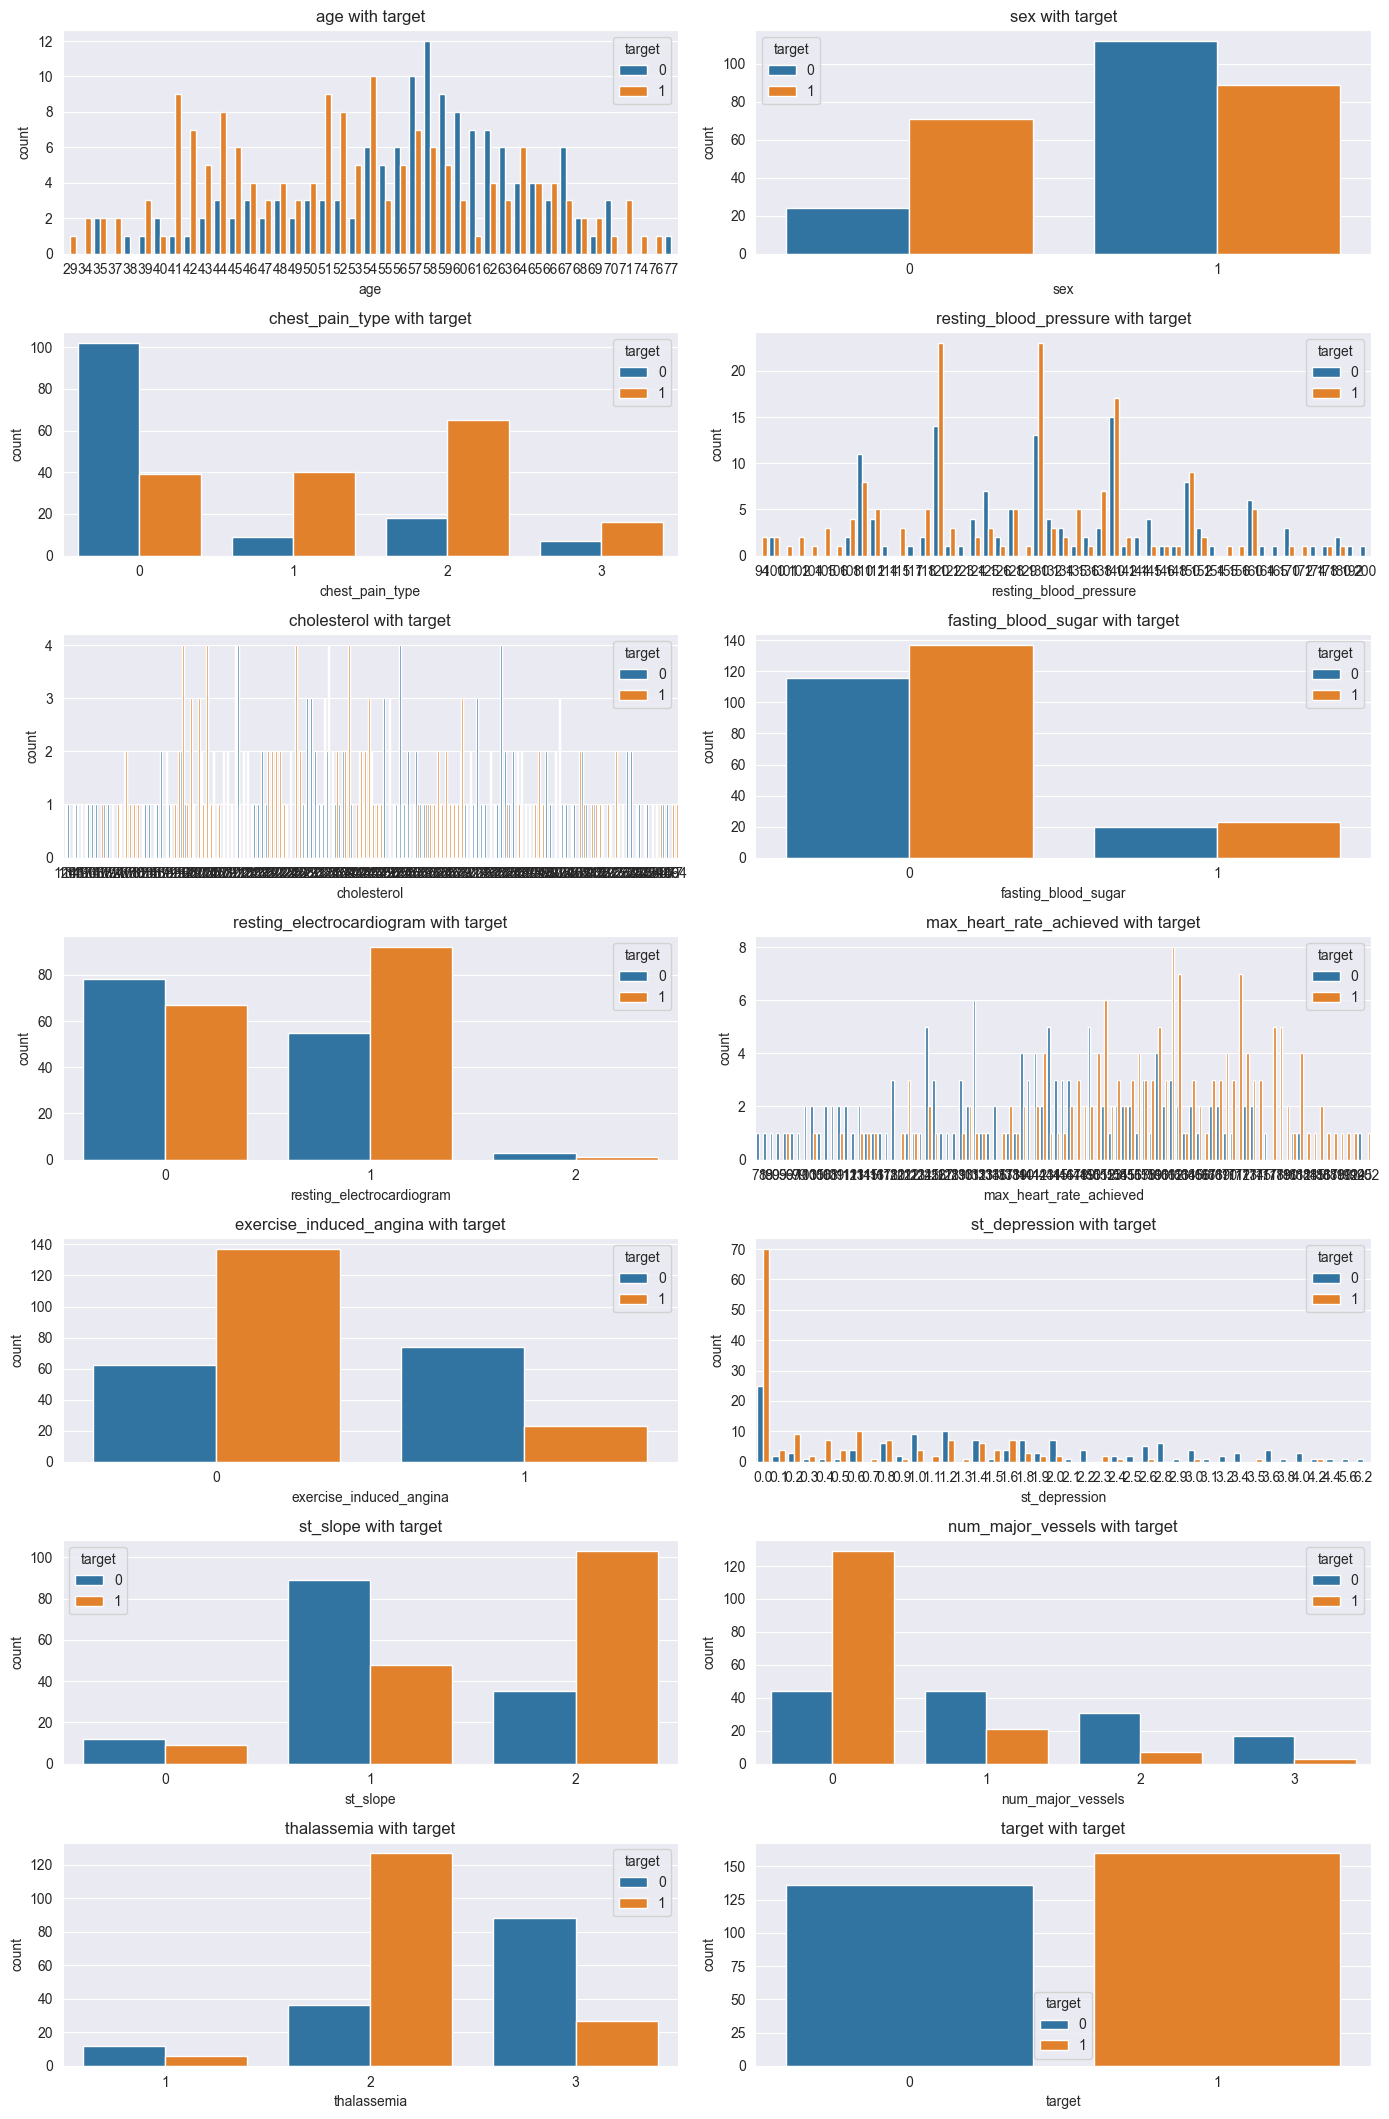

In [81]:
# Set Seaborn style
sns.set_style("darkgrid")

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(df.columns) * 3))
for idx, feature in enumerate(df.columns, 1):
	plt.subplot(len(df.columns), 2, idx)
	
	# Kernel density plot
	sns.countplot(data=df, x=feature, hue="target")
	plt.title(feature + " with target")

# Adjust layout and show plots
plt.tight_layout()
plt.show()
